- Reference: https://www.freecodecamp.org/news/how-to-detect-objects-in-images-using-yolov8/
- Dataset: https://www.kaggle.com/datasets/tarunbisht11/yolo-animal-detection-small?resource=download

> This dataset contains images and labels of Monkeys, Cats, and Dogs.


In [4]:
from ultralytics import YOLO
from IPython.display import Image
import csv
import os
import glob

In [44]:
# Create labels for train and val

image_data = {}

# Map to classes
class_ids = {"monkey": 0, "cat": 1, "dog": 2}

def make_labels_txt(csv_file):

    # Create the directory for labels
    os.makedirs(f'data/{csv_file}/labels', exist_ok=True)

    with open(f'data/{csv_file}.csv', 'r') as csvfile:
        reader = csv.reader(csvfile)    
        next(reader) 
        for row in reader:
            filename, img_width, img_height, class_name, xmin, ymin, xmax, ymax = row

            # Calculate the center, width and height of the bounding box
            x_center = (float(xmin) + float(xmax)) / 2 / float(img_width)
            y_center = (float(ymin) + float(ymax)) / 2 / float(img_height)
            width = (float(xmax) - float(xmin)) / float(img_width)
            height = (float(ymax) - float(ymin)) / float(img_height)

            # Get the class_id from the dictionary
            class_id = class_ids[class_name]

            # Add the data to the dictionary
            if filename in image_data:
                image_data[filename].append([class_id, x_center, y_center, width, height])
            else:
                image_data[filename] = [[class_id, x_center, y_center, width, height]]

    # Write the data to text files
    for filename, boxes in image_data.items():
        with open(os.path.join(f'data/{csv_file}/labels', f'{os.path.splitext(filename)[0]}.txt'), 'w') as file:
                for box in boxes:
                    file.write(' '.join(map(str, box)) + '\n')

In [45]:
# Make labels for train data
make_labels_txt("train")

# Make labels for val data
make_labels_txt("val")

In [47]:
# Check contents in train label
with open('data/train/labels/cats_and_monkeys_001.txt', 'r') as file:
    print(file.read())

1 0.5822784810126582 0.7894736842105263 0.5569620253164557 0.41353383458646614
0 0.7120253164556962 0.4116541353383459 0.5759493670886076 0.7556390977443609



In [48]:
# Check contents in val label
with open('data/val/labels/cats_and_monkeys_000.txt', 'r') as file:
    print(file.read())

1 0.540084388185654 0.6105341246290801 0.8818565400843882 0.6068249258160238
0 0.45569620253164556 0.5178041543026706 0.9071729957805907 0.913946587537092



In [54]:
# Remove all XML files in filder
def remove_xml_files(folder):
    pattern = f"data/{folder}/images/*.xml"
    xml_files = glob.glob(pattern)
    for xml_file in xml_files:
        os.remove(xml_file)

remove_xml_files('train')
remove_xml_files('val')

# YOLOv8

In [5]:
# Download YOLO v8 pretrained model
model = YOLO("yolov8n.pt")

In [6]:
# Training with 10 epochs and image resized to 320
model.train(data="data.yaml", epochs=10, imgsz=320)

Ultralytics YOLOv8.1.1 🚀 Python-3.9.18 torch-2.1.2 CPU (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, forma

train: Scanning /Users/nguyenvietthai/Library/CloudStorage/OneDrive-EPITA/S3. Computer Vision & Image Analysis/DSA-Computer-Vision/Lab_02/data/train/labels.cache... 469 images, 0 backgrounds, 0 corrupt: 100%|██████████| 469/469 [00:00<?, ?it/s]
val: Scanning /Users/nguyenvietthai/Library/CloudStorage/OneDrive-EPITA/S3. Computer Vision & Image Analysis/DSA-Computer-Vision/Lab_02/data/val/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<?, ?it/s]


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.084      2.643      1.223         16        320: 100%|██████████| 30/30 [00:57<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all         51        113      0.553      0.367      0.407      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.155      1.911       1.28         10        320: 100%|██████████| 30/30 [00:58<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.44s/it]

                   all         51        113      0.501      0.389      0.389      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       3/10         0G      1.117      1.748      1.253         16        320: 100%|██████████| 30/30 [00:57<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.50s/it]

                   all         51        113      0.411      0.527      0.457      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.164      1.674      1.284         14        320: 100%|██████████| 30/30 [00:57<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all         51        113      0.439      0.341      0.361      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/10         0G      1.178      1.681      1.303          8        320: 100%|██████████| 30/30 [00:56<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all         51        113      0.397      0.407      0.375       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/10         0G      1.102      1.533      1.268          6        320: 100%|██████████| 30/30 [00:57<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.50s/it]

                   all         51        113      0.415       0.53      0.502      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.061      1.464      1.226         17        320: 100%|██████████| 30/30 [00:55<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all         51        113      0.703      0.586      0.646      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.071      1.418      1.228         29        320: 100%|██████████| 30/30 [00:56<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

                   all         51        113      0.707      0.532      0.645      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.008      1.292      1.176         25        320: 100%|██████████| 30/30 [00:55<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all         51        113      0.746      0.613       0.66      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      0.975        1.2      1.154         11        320: 100%|██████████| 30/30 [00:56<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all         51        113      0.769      0.605      0.716       0.52

10 epochs completed in 0.168 hours.


Optimizer stripped from runs/detect/train8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 6.2MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.1.1 🚀 Python-3.9.18 torch-2.1.2 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.47s/it]


                   all         51        113      0.769      0.605      0.716      0.521
                monkey         51         43      0.915      0.581      0.729      0.556
                   cat         51         40      0.565        0.5      0.573      0.413
                   dog         51         30      0.828      0.733      0.847      0.593
Speed: 0.3ms preprocess, 53.0ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x2af016670>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [7]:
model.export(format='onnx')

Ultralytics YOLOv8.1.1 🚀 Python-3.9.18 torch-2.1.2 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train8/weights/best.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 7, 2100) (5.9 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 0.4s, saved as 'runs/detect/train8/weights/best.onnx' (11.6 MB)

Export complete (0.7s)
Results saved to /Users/nguyenvietthai/Library/CloudStorage/OneDrive-EPITA/S3. Computer Vision & Image Analysis/DSA-Computer-Vision/Lab_02/runs/detect/train8/weights
Predict:         yolo predict task=detect model=runs/detect/train8/weights/best.onnx imgsz=320  
Validate:        yolo val task=detect model=runs/detect/train8/weights/best.onnx imgsz=320 data=data.yaml  
Visualize:       https://netron.app


'runs/detect/train8/weights/best.onnx'

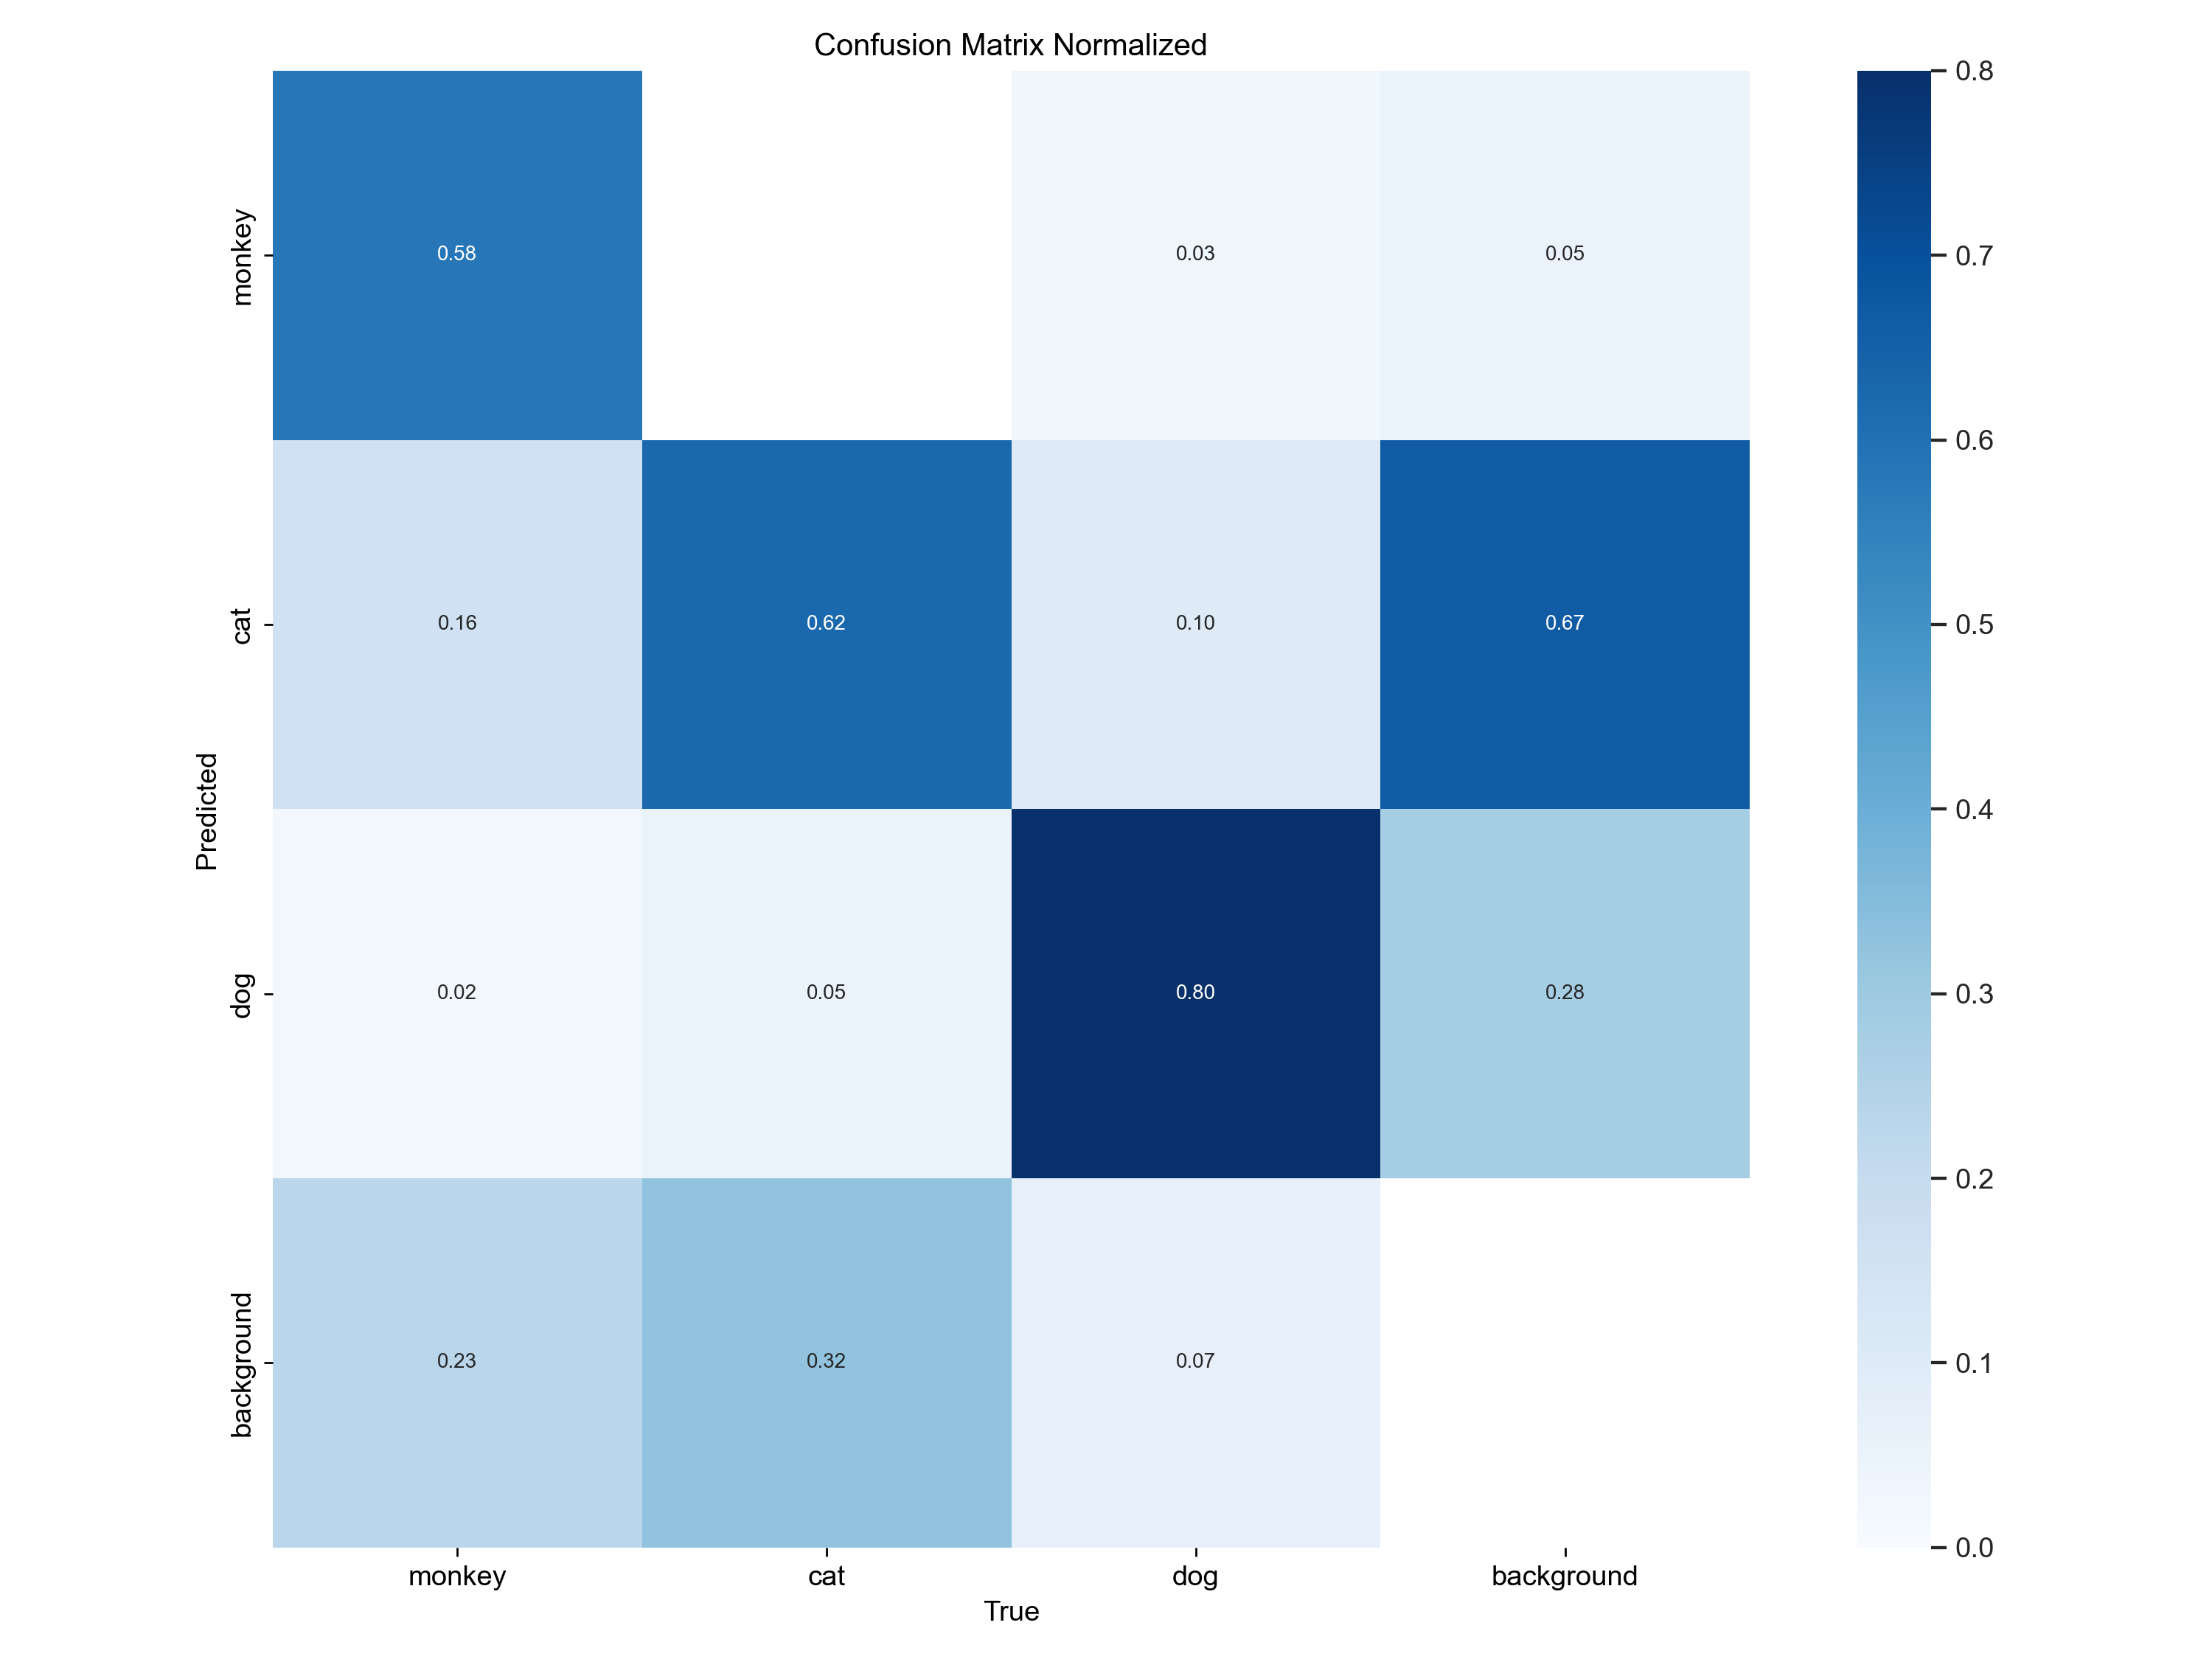

In [8]:
# Confusion matrix
Image('runs/detect/train8/confusion_matrix_normalized.png', width=800)

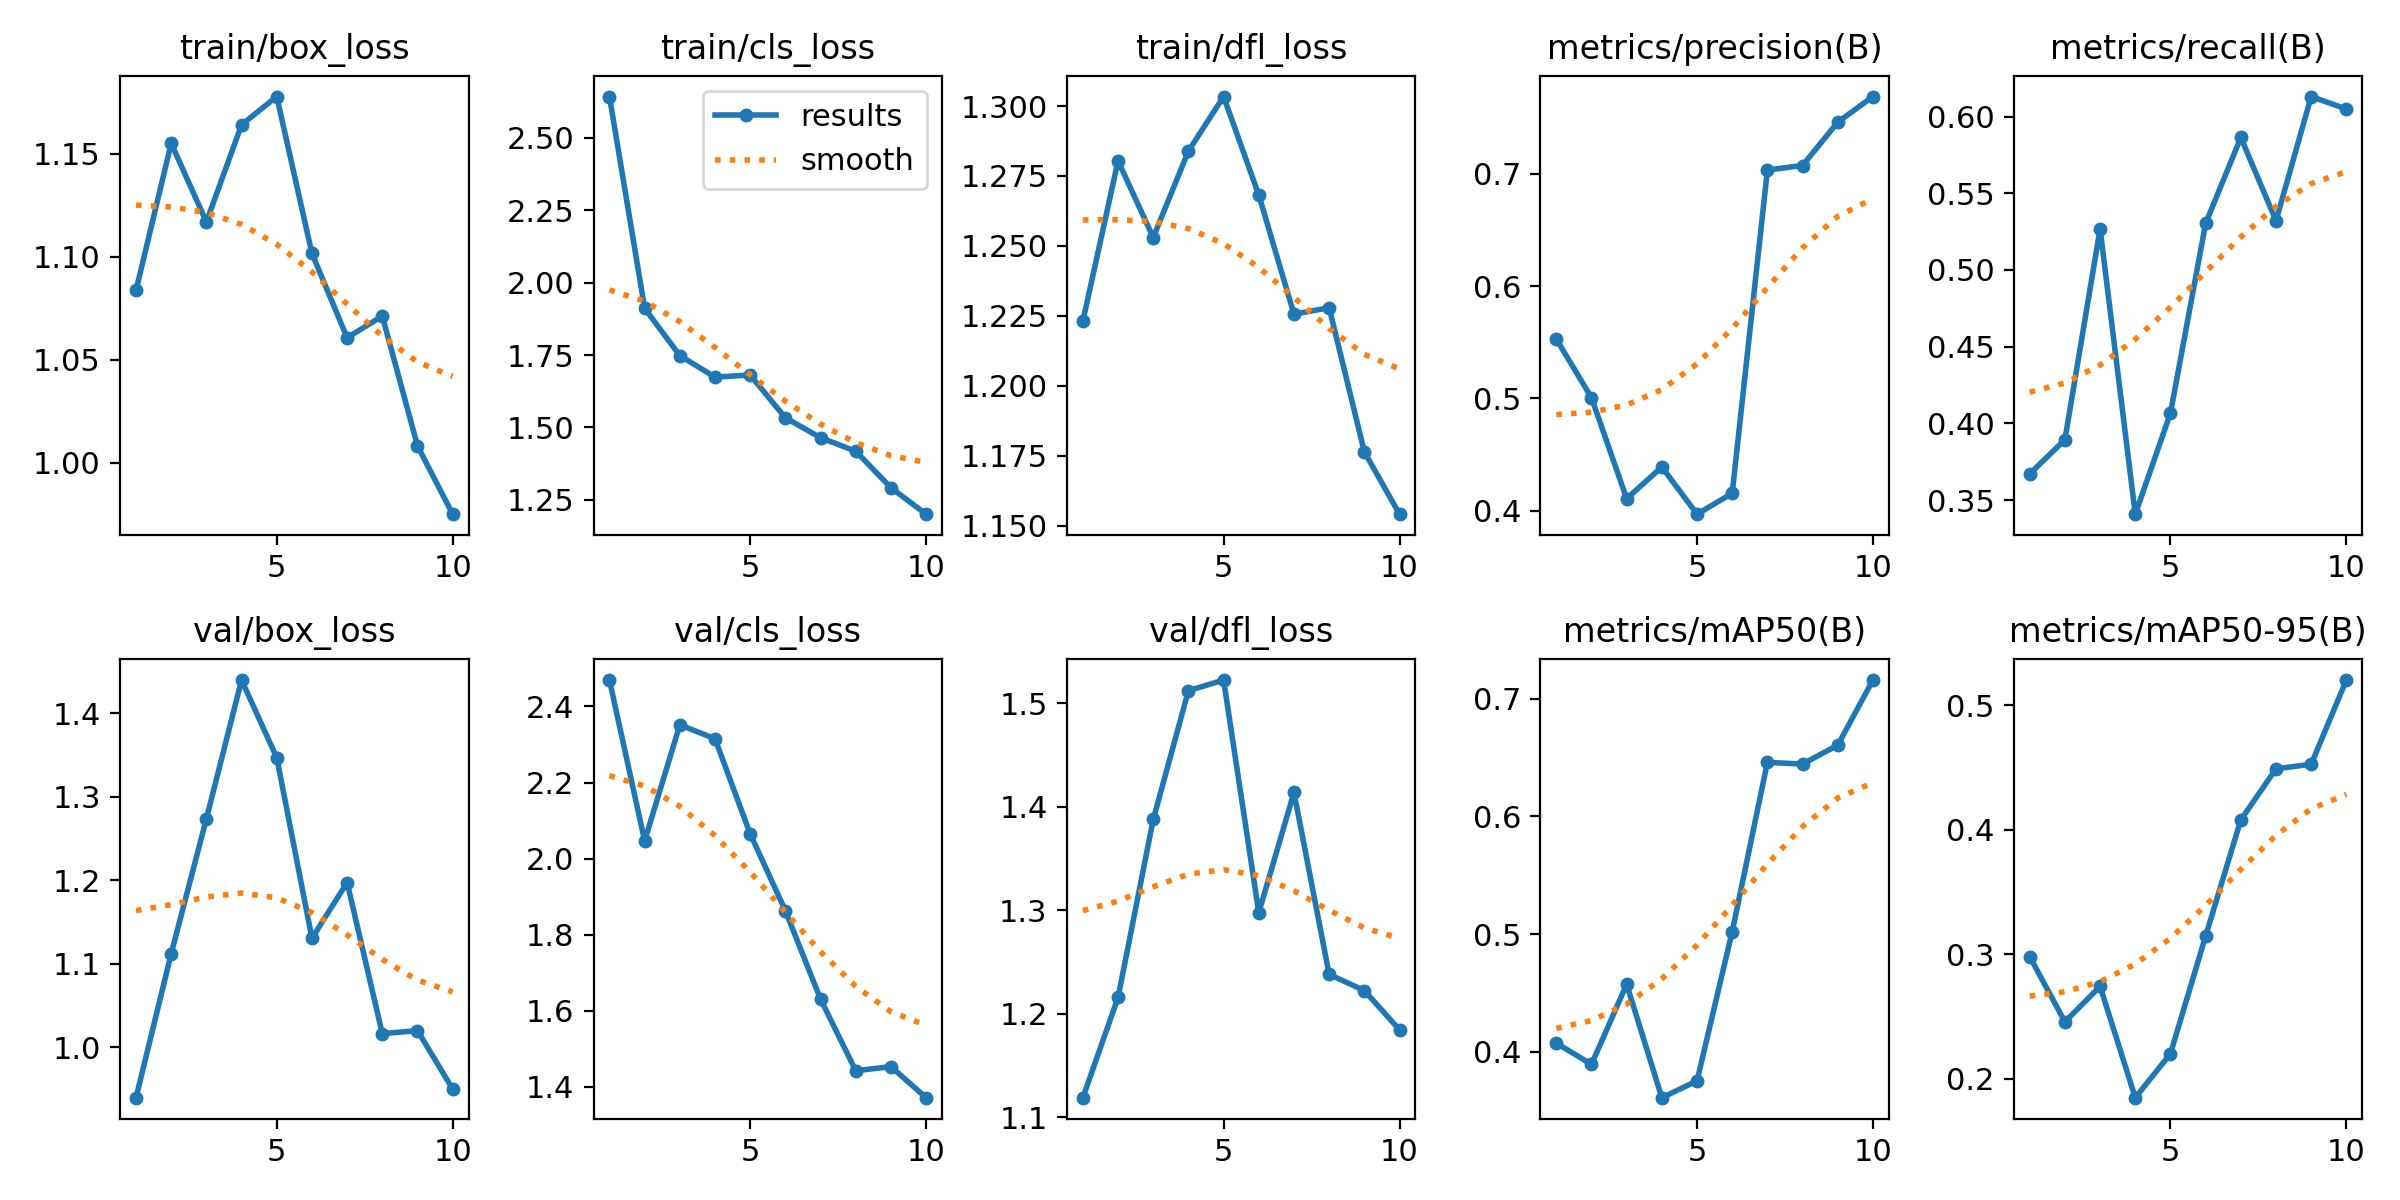

In [9]:
# Results
Image('runs/detect/train8/results.png', width=800)

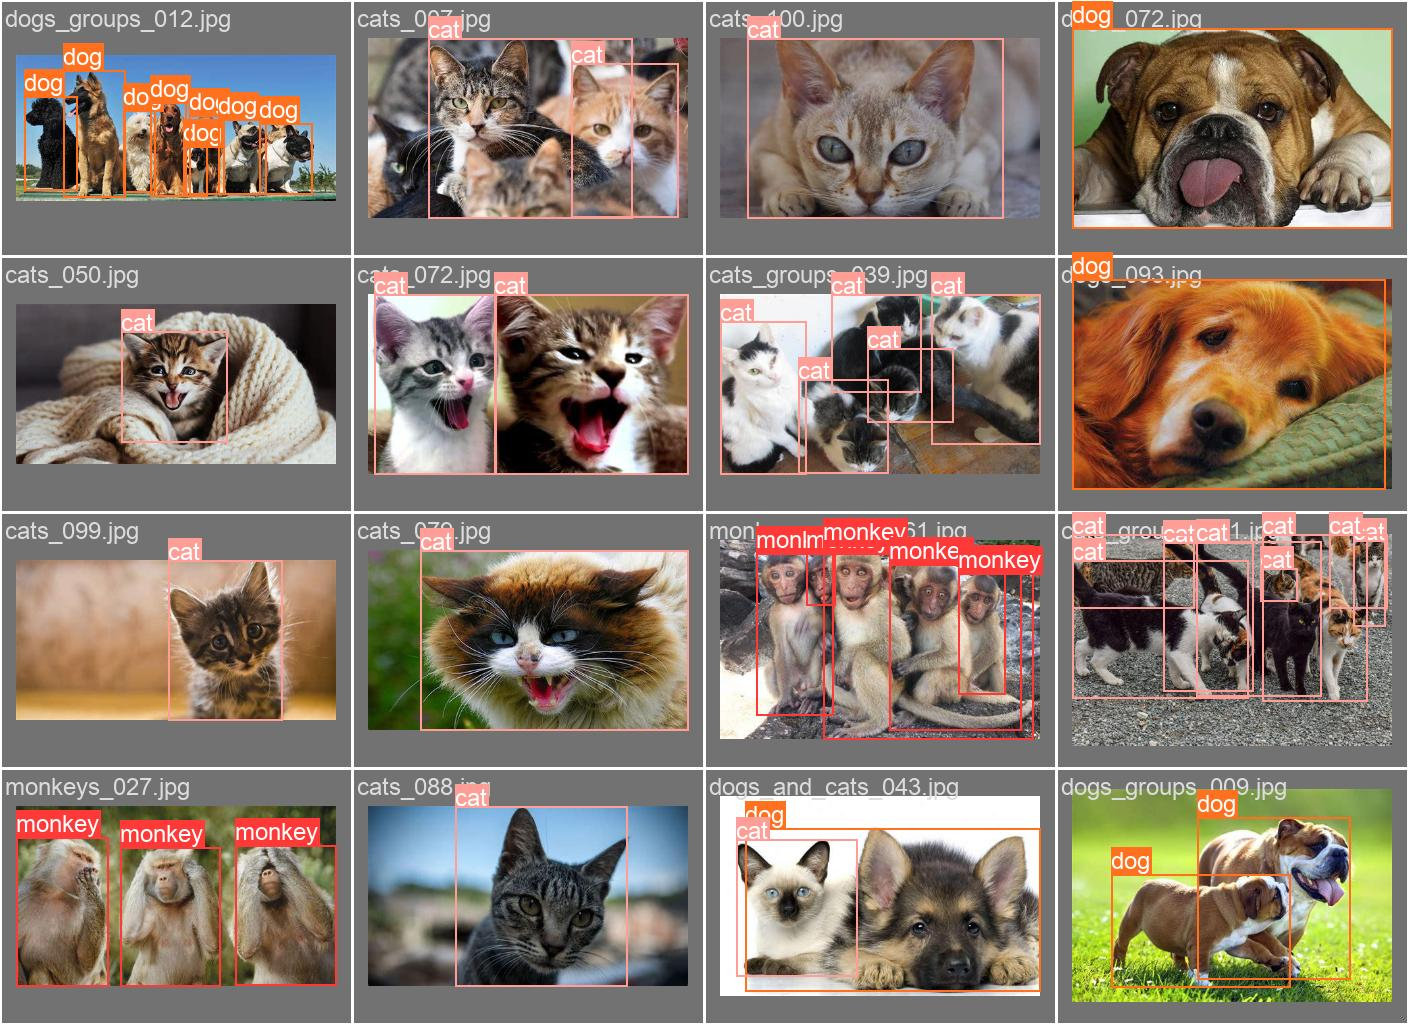

In [10]:
# Show labels
Image('runs/detect/train8/val_batch0_labels.jpg', width=800)

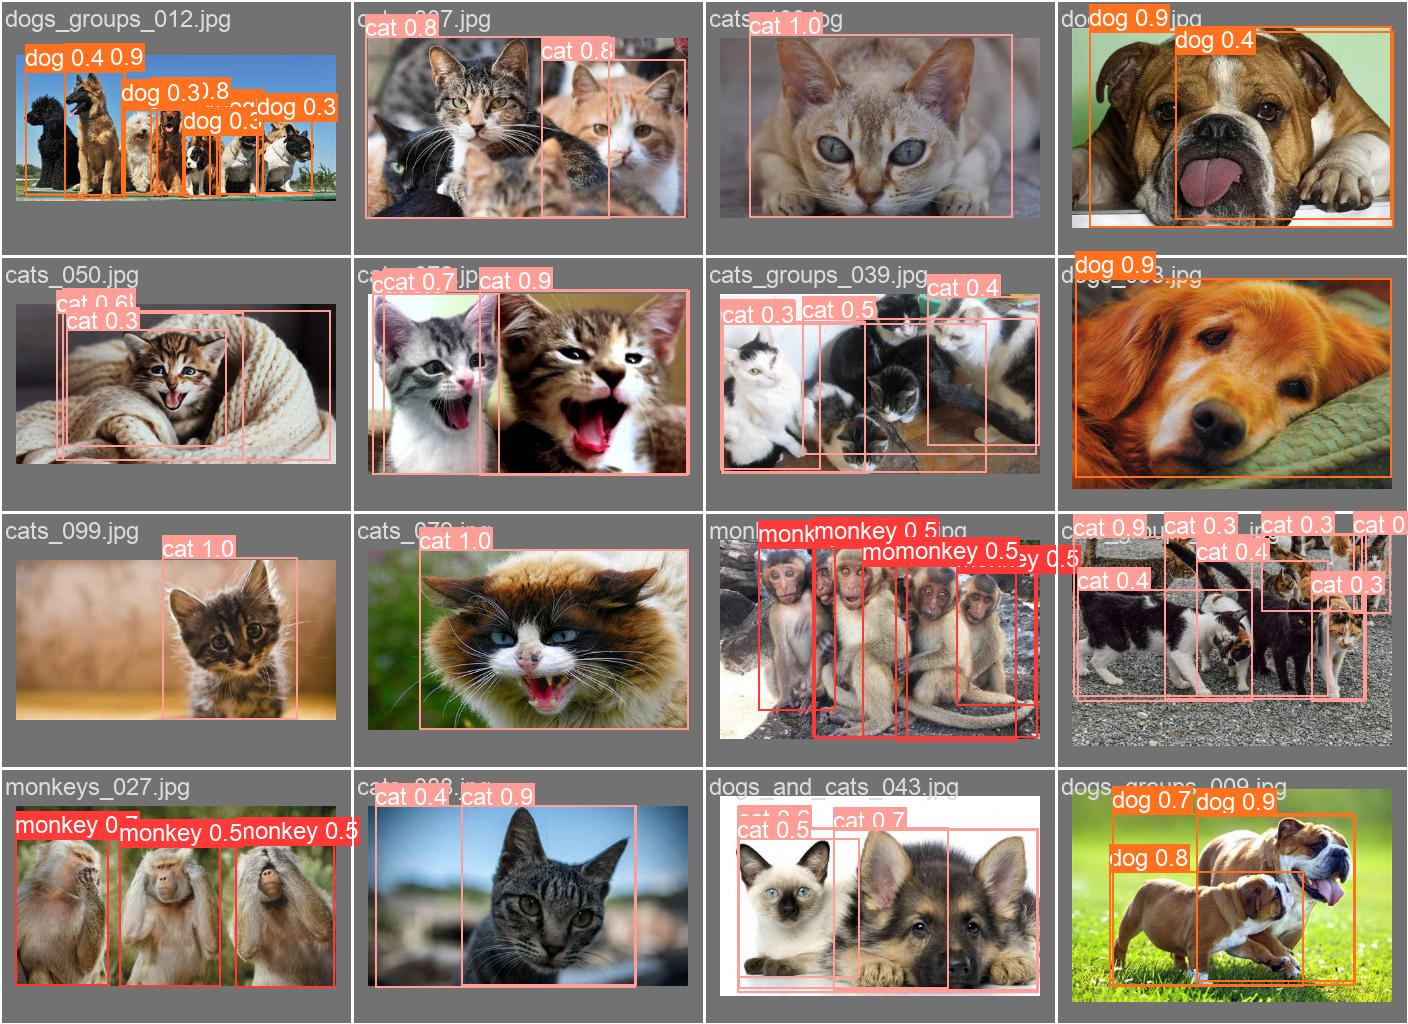

In [11]:
# Show predictions
Image('runs/detect/train8/val_batch0_pred.jpg', width=800)

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = 3

# Initialize the model
model = Sequential()

# Add convolutional layer with 32 filters, 3x3 filter size, input shape of 64x64x3 (adjust as needed), and 'relu' activation
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Add max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 filters and 'relu' activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the tensor output from the previous layer
model.add(Flatten())

# Add a dense layer with 128 units and 'relu' activation
model.add(Dense(128, activation='relu'))

# Add dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))

# Add output dense layer with number of classes and 'softmax' activation
model.add(Dense(num_classes, activation='softmax')) 

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [17]:
# Train the model
model.fit(train, train_labels, epochs=10, validation_data=(test_images, test_labels))

NameError: name 'train_images' is not defined

# Conclusion

- The accuracy of YOLOv8 is not really high. There is still wrong detection. Should increase the epoch

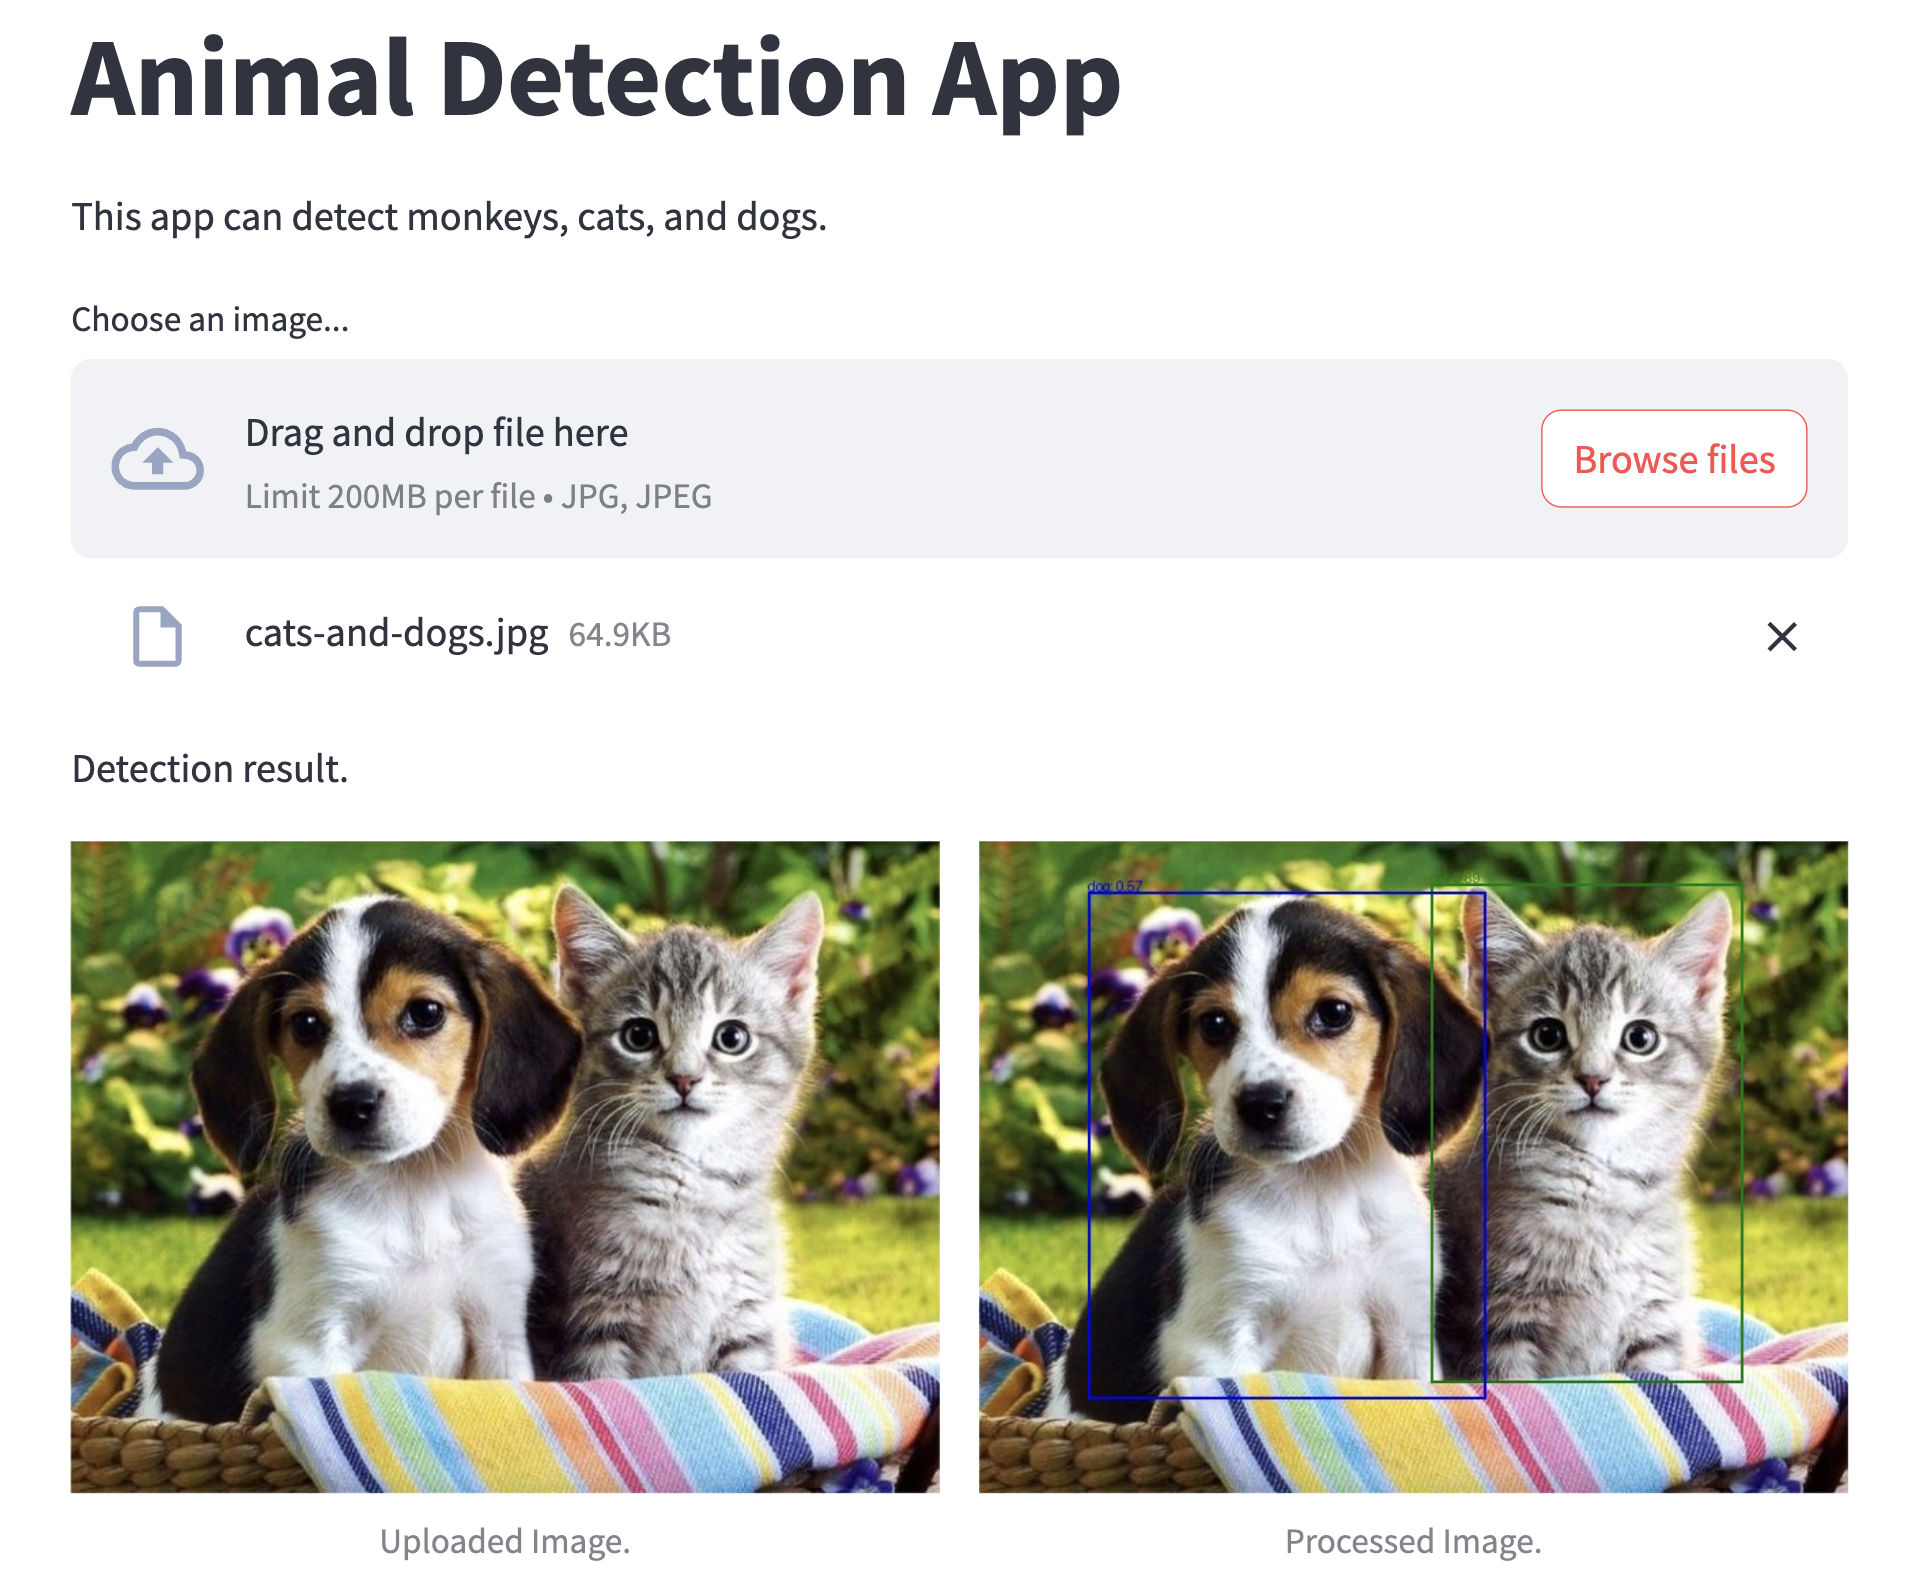

In [14]:
# Show detection in Streamlit app
Image("streamlit.png", width=800)